# TP 1 - 2C 2018
# GRUPO 11
# ANÁLISIS EXPLORATORIO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import datetime as DT
import calendar

from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

%matplotlib inline

In [2]:
df_eventos = pd.read_csv('/home/lautaro/Desktop/events.csv',low_memory=False)

In [3]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

def model_split(model):
    return model.str.split(' ', expand=True)

def numero_a_mes(numero):
    return calendar.month_abbr[numero]

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

df_eventos['sku'] = pd.to_numeric(df_eventos['sku'], errors='coerce')
df_eventos['timestamp'] = pd.to_datetime(df_eventos['timestamp'], format='%Y-%m-%d')
df_eventos['timestamp_diaDelAnio'] = df_eventos["timestamp"].dt.dayofyear
df_eventos['timestamp_diaDeLaSemana'] = df_eventos["timestamp"].dt.dayofweek
df_eventos['timestamp_diaDeLaSemana_desc'] = df_eventos['timestamp'].map(fecha_a_dia)
df_eventos['timestamp_mes'] = df_eventos['timestamp'].dt.month
df_eventos["timestamp_mes_desc"] = df_eventos["timestamp_mes"].map(numero_a_mes)
df_eventos['model_marca'] =df_eventos.model.str.strip().str.split(' ', expand=True)[0]
df_eventos['model_tipo'] =df_eventos.model.str.strip().str.split(' ', expand=True)[1]
df_eventos['model_subtipo'] =df_eventos.model.str.strip().str.split(' ', expand=True)[2]
df_eventos['total'] = 1 # Para contabilizar eventos

# 1. Vista general del dataset

In [4]:
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 32 columns):
timestamp                       1011288 non-null datetime64[ns]
event                           1011288 non-null object
person                          1011288 non-null object
url                             82756 non-null object
sku                             563836 non-null float64
model                           564284 non-null object
condition                       563836 non-null object
storage                         563836 non-null object
color                           563836 non-null object
skus                            221699 non-null object
search_term                     48967 non-null object
staticpage                      3598 non-null object
campaign_source                 82796 non-null object
search_engine                   50957 non-null object
channel                         87378 non-null object
new_vs_returning                87378 non-null object
cit

In [5]:
df_eventos.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,browser_version,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,timestamp_mes,timestamp_mes_desc,model_marca,model_tipo,model_subtipo,total
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,151,3,Thursday,5,May,NaN,NaN,NaN,1
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrome Mobile 39,151,3,Thursday,5,May,NaN,NaN,NaN,1
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,151,3,Thursday,5,May,iPhone,5s,None,1
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,151,3,Thursday,5,May,iPhone,5s,None,1
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,149,1,Tuesday,5,May,Samsung,Galaxy,S8,1
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Android 5.1,149,1,Tuesday,5,May,NaN,NaN,NaN,1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,149,1,Tuesday,5,May,NaN,NaN,NaN,1
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,149,1,Tuesday,5,May,Samsung,Galaxy,S8,1
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,99,0,Monday,4,Apr,NaN,NaN,NaN,1
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrome 65.0,99,0,Monday,4,Apr,NaN,NaN,NaN,1


¿Cuáles son los eventos con los que contamos?

In [6]:
print(df_eventos['event'].unique())

['ad campaign hit' 'visited site' 'viewed product' 'checkout'
 'generic listing' 'search engine hit' 'brand listing' 'searched products'
 'conversion' 'staticpage' 'lead']


¿En qué países nos estamos manejando?

In [7]:
print(df_eventos['country'].unique())

[nan 'Brazil' 'Unknown' 'United States' 'Argentina' 'Russia' 'Canada'
 'Netherlands' 'France' 'Paraguay' 'Mexico' 'Mozambique' 'Philippines'
 'Israel' 'Bangladesh' 'Italy' 'United Kingdom' 'Angola' 'Portugal'
 'Uzbekistan' 'Venezuela' 'Belize' 'Colombia' 'China' 'French Guiana'
 'Algeria' 'Japan' 'India' 'Dominican Republic' 'Ireland' 'Zimbabwe'
 'Turkey' 'Germany' 'Sri Lanka' 'Rwanda' 'Romania' 'Saudi Arabia'
 'Morocco' 'Uruguay' 'Switzerland' 'Cape Verde' 'Denmark' 'Peru'
 'Guadeloupe' 'Poland' 'South Africa' 'Spain']


¿Qué productos estamos comercializando?

In [8]:
print(df_eventos['model'].unique())

[nan 'iPhone 5s' 'Samsung Galaxy S8' 'Motorola Moto Z Play'
 'iPhone 7 Plus' 'iPhone 6S' 'iPhone 4G' 'iPhone 4S' 'Samsung Galaxy J5'
 'iPhone 5c' 'iPhone 7' 'iPhone 6' 'Samsung Galaxy S6 Flat'
 'Motorola Moto G3 4G' 'Motorola Moto G4 Play DTV' 'Asus Zenfone 2'
 'iPhone 5' 'Motorola Moto X Play 4G Dual' 'Motorola Moto X2'
 'Samsung Galaxy A7 2016' 'iPhone 6S Plus'
 'Samsung Galaxy Core Plus Duos TV' 'Samsung Galaxy Win Duos'
 'Samsung Galaxy S7' 'Samsung Galaxy Core 2 Duos' 'Samsung Galaxy J7'
 'Quantum GO 4G' 'Lenovo Vibe A7010 Dual Chip' 'Sony Xperia M4 Aqua'
 'Motorola Moto G4 Plus' 'Samsung Galaxy J7 2016 Metal'
 'Samsung Galaxy J1 2016' 'Lenovo Vibe K5' 'Motorola Moto G2 3G Dual'
 'Samsung Galaxy Y Duos' 'Motorola Moto G2 4G Dual'
 'Sony Xperia M4 Aqua Dual' 'Samsung Galaxy S5' 'Motorola Moto Z2 Play'
 'Motorola Moto MAXX ' 'Motorola Moto X Force' 'Samsung Galaxy S7 Edge'
 'Sony Xperia Z3 Plus' 'Sony Xperia Z3 Dual' 'LG G4 H815P' 'LG G4 H818P'
 'Samsung Galaxy S6 Edge' 'iPhone 6 Pl

# 2. Análisis preliminar del set de datos

En esta sección vamos a incluir todos los análisis que consideramos debemos realizar antes de cualquier otro ya que de no ser tenidos en cuenta pueden causar análisis con resultados contaminados o erróneos.

## 2.1 Análisis de rango de fechas

Primero vamos a ver entre que fechas suceden los eventos que nos fueron otorgados, empiezo buscando la primera disponible.

In [9]:
df_eventos["timestamp"].min()

Timestamp('2018-01-01 07:32:26')

La primera fecha es el primero de enero de este año. A continuación busco la última.

In [10]:
df_eventos["timestamp"].max()

Timestamp('2018-06-15 23:59:31')

La ultima fecha es de mitad de junio asi que si hacemos estadisticas por mes debemos tener en cuenta que dicho mes no esta completamente cargado.

# 3. Análisis del tráfico del sitio

## 3.1 Cantidad de visitas

In [11]:
    cantidad_trafico = df_eventos.loc[df_eventos["event"] == "visited site",
                                      ["timestamp","timestamp_diaDeLaSemana", "timestamp_diaDeLaSemana_desc","timestamp_mes","timestamp_mes_desc", "total"]]

In [12]:
cantidad_trafico.head()

,timestamp,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,timestamp_mes,timestamp_mes_desc,total
1,2018-05-31 23:38:05,3,Thursday,5,May,1
5,2018-05-29 13:29:26,1,Tuesday,5,May,1
9,2018-04-09 20:12:31,0,Monday,4,Apr,1
16,2018-05-24 11:21:07,3,Thursday,5,May,1
45,2018-04-06 05:12:05,4,Friday,4,Apr,1


### 3.1.1 Cantidad de visitas por mes

In [13]:
visitas_por_mes = cantidad_trafico.loc[:,["timestamp_mes", "timestamp_mes_desc", "total"]]

In [14]:
visitas_por_mes = visitas_por_mes.groupby(["timestamp_mes", "timestamp_mes_desc"], as_index=False).sum()
visitas_por_mes

,timestamp_mes,timestamp_mes_desc,total
0,1,Jan,2135
1,2,Feb,2790
2,3,Mar,7247
3,4,Apr,12650
4,5,May,40137
5,6,Jun,22419


Text(0,0.5,'Cantidad de visitas')

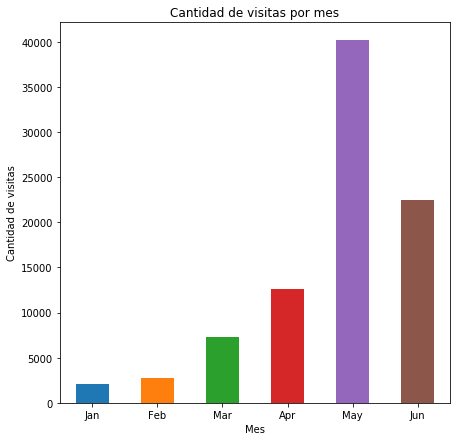

In [15]:
visitas_por_mes.plot(kind="bar",rot=0, figsize=(7,7), legend=False, x="timestamp_mes_desc", y="total")
plt.title("Cantidad de visitas por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de visitas")

Por el análisis que hicimos del rango de fechas (2.1), sabemos que los datos de junio son parciales.

Podemos observar un incremento en el trafico del sitio web notable por mes

### 3.1.2 Cantidad de visitas por día y hora

In [16]:
visitas = df_eventos.loc[df_eventos["event"] == "visited site", ["timestamp", "timestamp_diaDeLaSemana", "total"]]

In [17]:
visitas["timestamp"] = pd.to_numeric(visitas["timestamp"].dt.hour)

In [18]:
visitas = visitas.groupby(["timestamp", "timestamp_diaDeLaSemana"], as_index=False).sum()

In [19]:
visitas.head()

,timestamp,timestamp_diaDeLaSemana,total
0,0,0,587
1,0,1,891
2,0,2,815
3,0,3,835
4,0,4,814


In [20]:
visitas = visitas.pivot("timestamp", "timestamp_diaDeLaSemana", "total").sort_values(by="timestamp",ascending=False)

Text(69,0.5,'Hora')

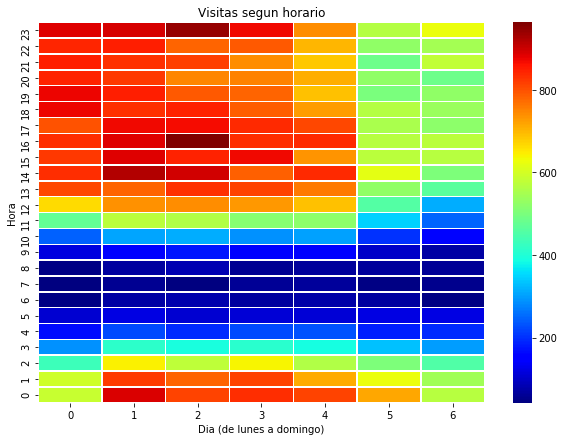

In [21]:
plt.subplots(figsize=(10,7))
grafico = sns.heatmap(visitas, linewidths = .5, cmap="jet")

plt.title("Visitas segun horario")
plt.xlabel("Dia (de lunes a domingo)")
plt.ylabel("Hora")

En primer lugar podemos observar que los fines de semana las visitas al sitio disminuyen, por otro lado el mayor pico de visitas al sitio se da los días miércoles entre los rangos de 16 a 17hs y 23 a 24 hs.

## 3.2 Origen del tráfico

### 3.2.1 Países desde donde se accede a Trocafone.

In [22]:
df_eventos_groupby_country = df_eventos.groupby(['country']).sum()
df_eventos_groupby_country = df_eventos_groupby_country[['total']].reset_index()
df_eventos_groupby_country.set_index('country', inplace=True)

In [23]:
df_eventos_groupby_country.sort_values('total', ascending=False)

,total
country,
Brazil,84308
Unknown,2313
United States,465
Argentina,94
Canada,35
Netherlands,13
France,13
Mozambique,12
United Kingdom,12


In [24]:
df_eventos_groupby_country_top5 = df_eventos_groupby_country.sort_values('total', ascending=False).head(5)
df_eventos_groupby_country_top5

,total
country,
Brazil,84308
Unknown,2313
United States,465
Argentina,94
Canada,35


Text(0,0.5,'Cantidad de accesos')

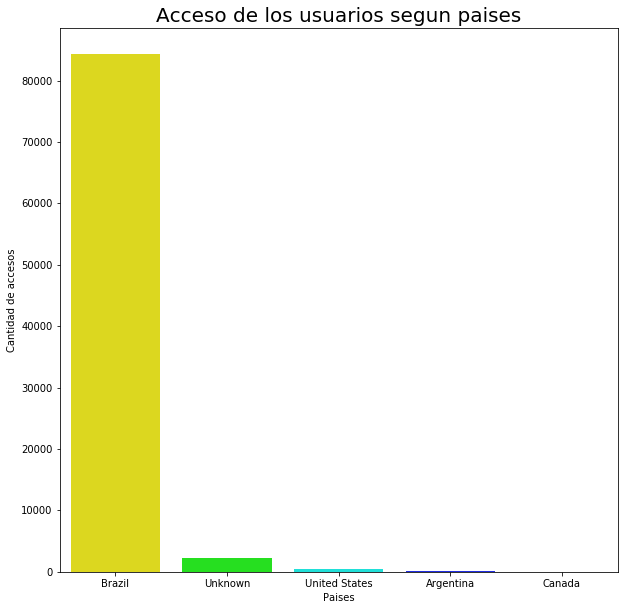

In [25]:
plt.subplots(figsize=(10,10))
ax = sns.barplot(y= "total", x = "country", data = df_eventos_groupby_country_top5.reset_index(), palette=("hsv"))
sns.set_context("poster")
ax.set_title("Acceso de los usuarios segun paises",fontsize=20)
ax.set_xlabel("Paises")
ax.set_ylabel("Cantidad de accesos")

Como primera observación vemos que la fuente de datos es principalmente Brasil, es de donde surge la principal operatoria de la empresa. Hay también un porcentaje pequeño que no se conoce el origen. Es muy amplia la diferencia a favor de Brasil por lo tanto no se elimina ya que es un análisis inicial. Luego siguen (y muy por debajo) Estados Unidos, Argentina y Canada.

### 3.2.2 Regiones con mayor actividad

In [26]:
df_eventos_groupby_region = df_eventos[df_eventos['country']=='Brazil'].groupby(['region']).sum()
df_eventos_groupby_region = df_eventos_groupby_region[['total']].reset_index()

df_eventos_groupby_region.loc[:,'region'] = df_eventos_groupby_region['region'].replace('í', 'i').replace('Á','A')

df_eventos_groupby_region.set_index('region', inplace=True)
df_eventos_groupby_region.sort_values('total', ascending=False)

,total
region,
Sao Paulo,24996
Unknown,12378
Minas Gerais,7755
Rio de Janeiro,6913
Bahia,5737
Pernambuco,2962
Ceara,2829
Parana,2602
Rio Grande do Sul,2576


In [27]:
df_eventos_groupby_region_top10 = df_eventos_groupby_region.sort_values('total', ascending=False)

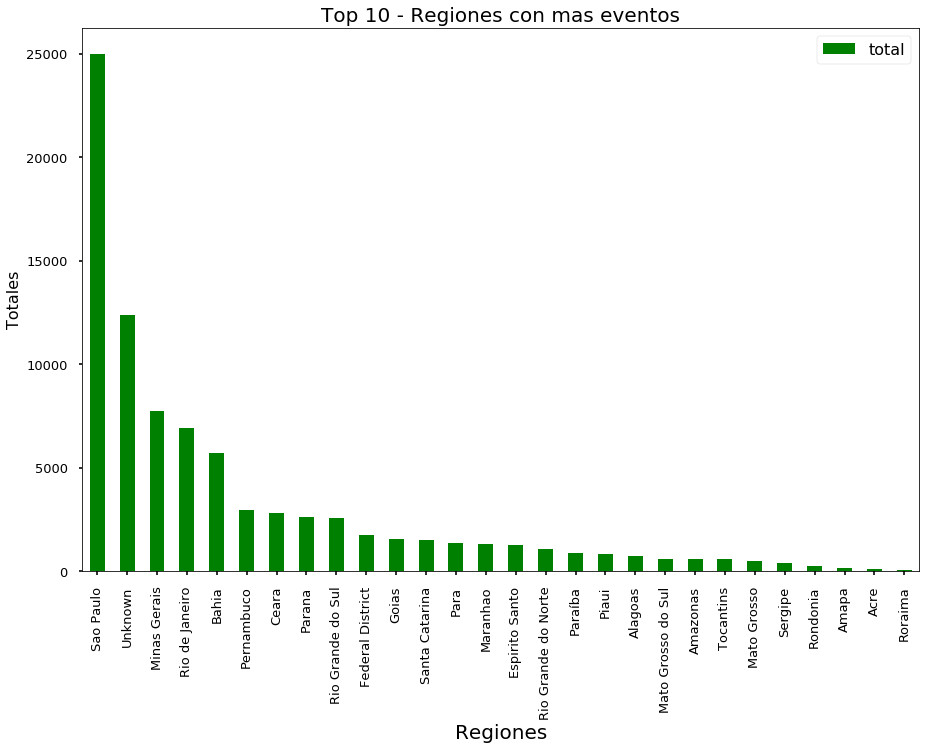

In [28]:
df_eventos_groupby_region_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Regiones con mas eventos', fontsize=20);
plt.ylabel('Totales', fontsize=16);
plt.xlabel('Regiones', fontsize=20);

### 3.2.3 Personas más activas

In [29]:
df_eventos_groupby_person = df_eventos.groupby(['person']).sum()
df_eventos_groupby_person = df_eventos_groupby_person[['total']].reset_index()
df_eventos_groupby_person.set_index('person', inplace=True)

In [30]:
df_eventos_groupby_person_top10 = df_eventos_groupby_person.sort_values('total', ascending=False).head(10)
df_eventos_groupby_person_top10

,total
person,
71492f2b,2771
6b07be7b,2770
285101a1,2140
3e34b3cf,1877
2d5a84c1,1800
5f25cb5d,1797
5af7e2bc,1773
3b5a5833,1705
d7e60792,1352


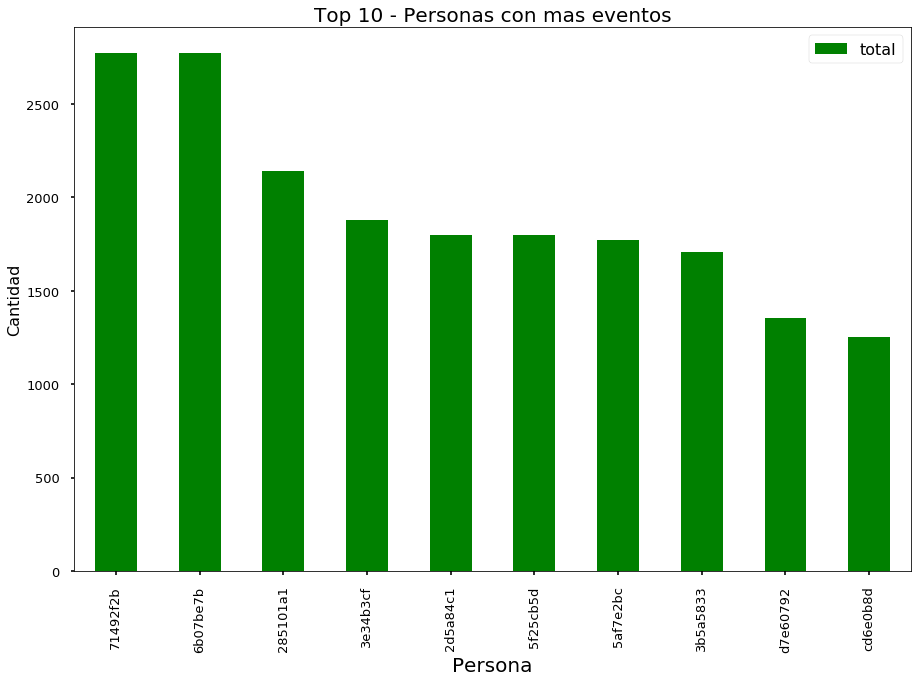

In [31]:
df_eventos_groupby_person_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Personas con mas eventos', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Persona', fontsize=20);

## 3.3 Información de navegación

Vamos a analizar algunos datos de la navegación de las personas que visitan el sitio, en particular qué Sistemas Operativos y qué resoluciones son más utilizados, de esta forma se puede dedicar más esfuerzo a que se revise periódicamente el correcto funcionamiento del sitio en estos dispositivos.

### 3.3.1 Sistemas operativos más utilizados

In [32]:
visitas_datos_navegacion = df_eventos.loc[df_eventos["event"] == "visited site", ['operating_system_version', 'total']]
visitas_datos_navegacion = visitas_datos_navegacion.groupby(['operating_system_version']).sum()
visitas_datos_navegacion_top10 = visitas_datos_navegacion.sort_values('total', ascending=False).head(10)
visitas_datos_navegacion_top10

,total
operating_system_version,
Windows 7,19675
Windows 10,17110
Android 7,9964
Android 6.0.1,7805
Android 6,6871
Android 5.1.1,4123
Android 7.1.1,3325
Windows 8.1,2781
Android 5.0.2,1640


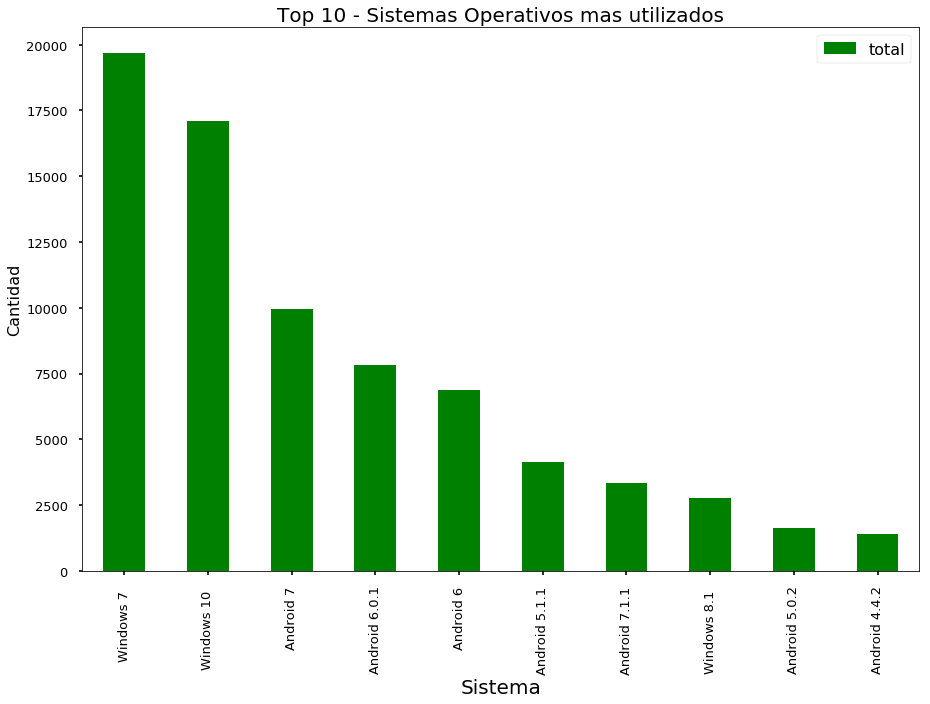

In [33]:
visitas_datos_navegacion_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Sistemas Operativos mas utilizados', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Sistema', fontsize=20);

### 3.3.1 Resoluciones de pantalla más utilizados

In [34]:
visitas_datos_navegacion = df_eventos.loc[df_eventos["event"] == "visited site", ['screen_resolution', 'total']]
visitas_datos_navegacion = visitas_datos_navegacion.groupby(['screen_resolution']).sum()
visitas_datos_navegacion_top10 = visitas_datos_navegacion.sort_values('total', ascending=False).head(10)
visitas_datos_navegacion_top10

,total
screen_resolution,
360x640,30009
1366x768,21379
320x534,3622
1920x1080,3521
320x570,2561
1360x768,2476
1600x900,2435
1024x768,2362
1440x900,2210


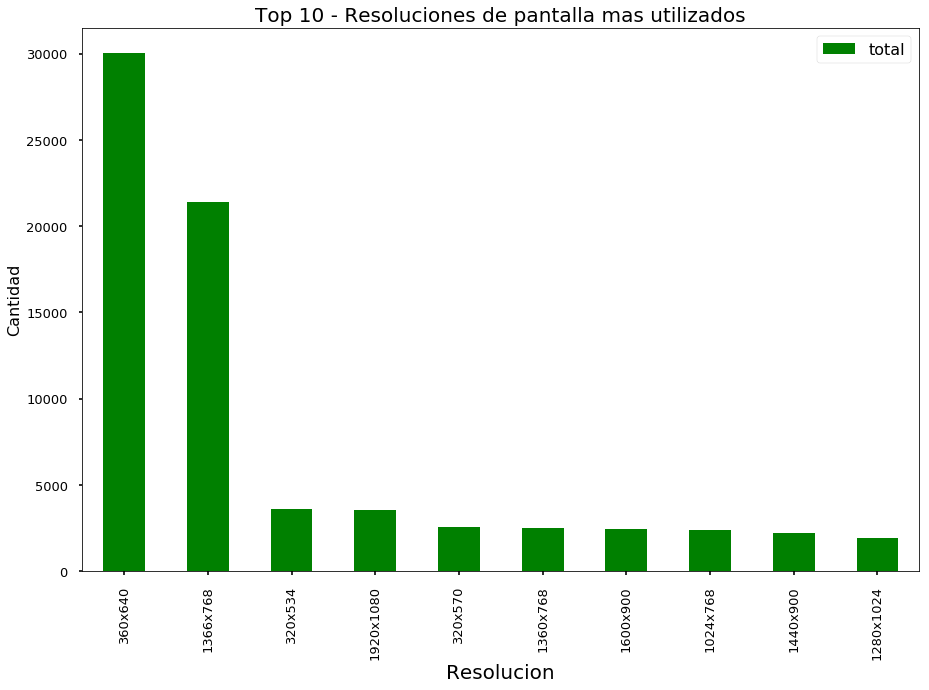

In [35]:
visitas_datos_navegacion_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Resoluciones de pantalla mas utilizados', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Resolucion', fontsize=20);

Podemos ver que si bien Windows 7 y Windows 10 son los Sistemas Operativos más frecuentes, en el global, hay una gran cantidad de personas que van a acceder al sitio a través de un dispositivo móvil.

# 4. Análisis de popularidad

En esta sección analizamos la popularidad de distintos productos, modelos y marcas según distintos parámetros

## 4.1 Popularidad de marcas en eventos

In [36]:
df_eventos_groupby_model = df_eventos.groupby(['model_marca']).sum()
df_eventos_groupby_model = df_eventos_groupby_model[['total']].reset_index()
df_eventos_groupby_model.set_index('model_marca', inplace=True)
df_eventos_groupby_model = df_eventos_groupby_model.sort_values('total', ascending=False)

In [37]:
df_eventos_groupby_model

,total
model_marca,
iPhone,256585
Samsung,218127
Motorola,63518
LG,9724
Sony,7025
Lenovo,4779
Asus,2091
iPad,1914
Quantum,520


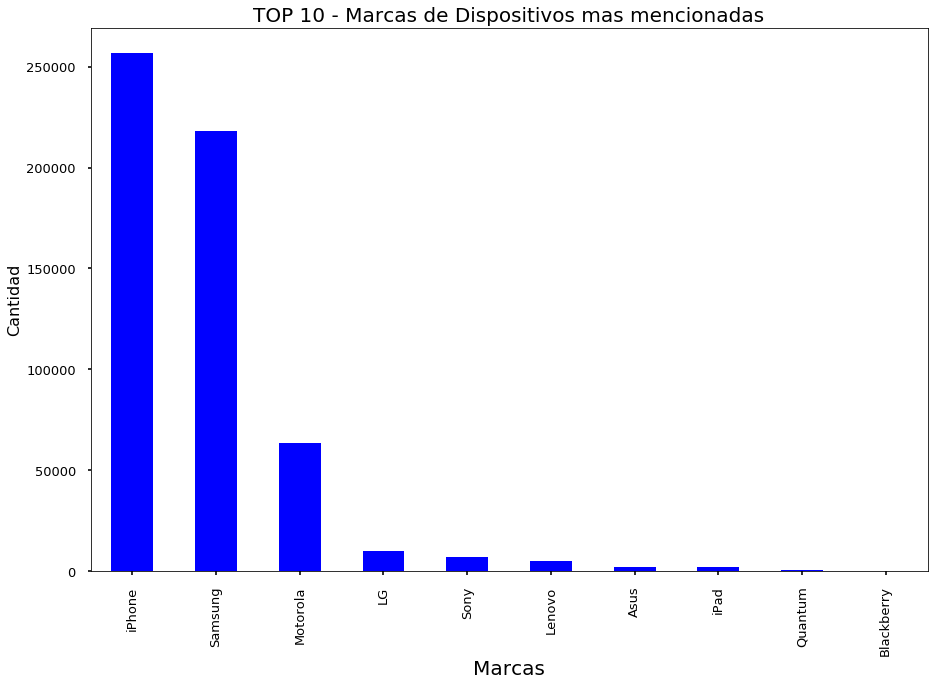

In [38]:
df_eventos_groupby_model.head(10).plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['blue'], fontsize=13, legend=False)
plt.title('TOP 10 - Marcas de Dispositivos mas mencionadas', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Marcas', fontsize=20);

Es clara la importancia tanto de de Apple como Samsnung como lideres del sector, seguido por Motorola. Las restantes marcas tiene una presencia menos importante.

## 4.2 Popularidad de palabras buscadas

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [40]:
busquedas = df_eventos.loc[df_eventos["event"] == "searched products",["timestamp","search_term"]]
busquedas = busquedas.loc[busquedas["search_term"].notnull(),:]

Text(0.5,1,'Wordcloud de palabras buscadas')

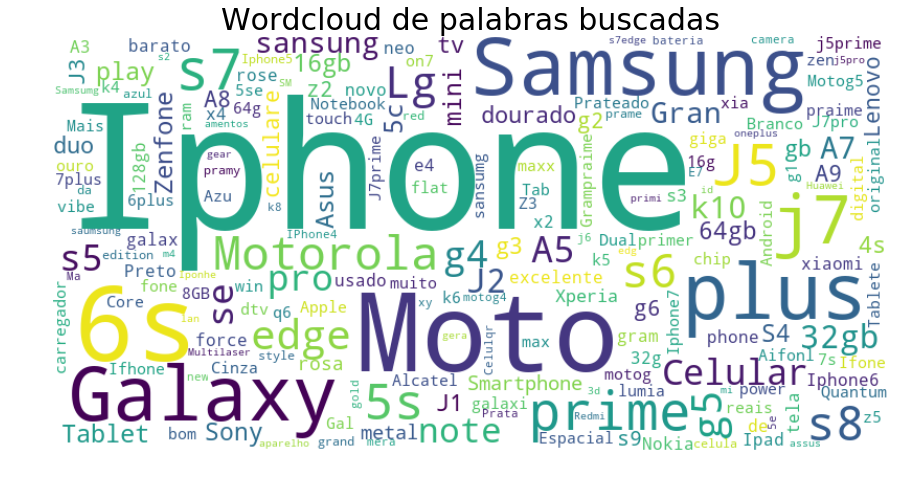

In [41]:
text = ' '.join(busquedas["search_term"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud de palabras buscadas", fontsize=30)

### 4.2.2 Modelos más listados en base a palabras buscadas

Text(0,0.5,'Modelo')

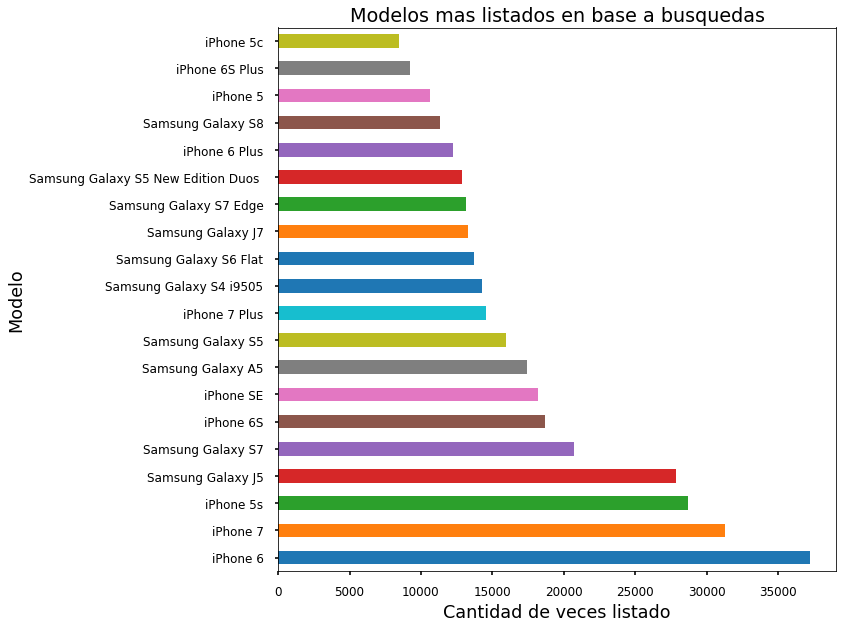

In [42]:
views = df_eventos.loc[df_eventos["event"] == "viewed product",["sku", "model"]]
views = views.groupby(['sku', 'model'], as_index=False).head(1)
busqueda = df_eventos.loc[df_eventos["event"] == "searched products", ["skus"]]
salida = tidy_split(busqueda, 'skus', ',')
salida['skus'] = pd.to_numeric(salida['skus'], errors='coerce')
salida['cantidad'] = 1
productos_listados = salida.merge(views, left_on="skus", right_on="sku", how="inner")
productos_listados = productos_listados.drop(columns="sku")
productos_listados = productos_listados.groupby(['model'], as_index=False).sum()
productos_listados = productos_listados.sort_values('cantidad', ascending=False)

productos_listados.sort_values(by="cantidad", ascending=False).head(20).plot(rot=0, kind="barh", x="model", y="cantidad", figsize=(10,10), legend=False, fontsize=12)

plt.title("Modelos mas listados en base a busquedas")
plt.xlabel("Cantidad de veces listado")
plt.ylabel("Modelo")

### 4.2.3 Marcas más listadas en base a búsquedas por marca (eventos de brand listing)

In [43]:
views = df_eventos.loc[df_eventos["event"] == "viewed product",["sku", "model_marca"]]
views = views.groupby(['sku', 'model_marca'], as_index=False).head(1)
busqueda = df_eventos.loc[df_eventos["event"] == "brand listing", ["skus"]]
salida = tidy_split(busqueda, 'skus', ',')
salida['skus'] = pd.to_numeric(salida['skus'], errors='coerce')
salida['cantidad'] = 1
productos_listados = salida.merge(views, left_on="skus", right_on="sku", how="inner")
productos_listados = productos_listados.drop(columns="sku")
productos_listados = productos_listados.groupby(['model_marca'], as_index=False).sum()
productos_listados

,model_marca,skus,cantidad
0,Asus,70260704,5052
1,LG,351202705,49915
2,Lenovo,50357820,6552
3,Motorola,1136650632,153805
4,Quantum,9645286,867
5,Samsung,2091843330,357079
6,Sony,201849430,25994
7,iPad,36312123,5944
8,iPhone,1722358252,347752


Text(0,0.5,'Marca')

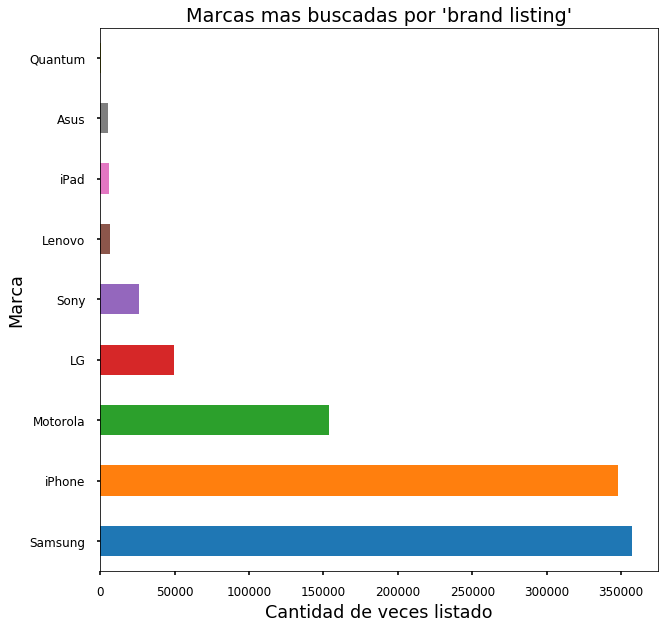

In [44]:
productos_listados.sort_values(by="cantidad", ascending=False).plot(rot=0, kind="barh", x="model_marca", y="cantidad", figsize=(10,10), legend=False, fontsize=12)

plt.title("Marcas mas buscadas por 'brand listing'")
plt.xlabel("Cantidad de veces listado")
plt.ylabel("Marca")

## 4.3 Modelos con mayor cantidad de solicitudes de stock

In [45]:
solicitudes_stock_mes = df_eventos.loc[df_eventos["event"] == "lead",["model", "timestamp_mes", "timestamp_mes_desc", "total"]]
solicitudes_stock_mes = solicitudes_stock_mes.groupby(["timestamp_mes", "timestamp_mes_desc", "model"], as_index=False).sum()

In [46]:
solicitudes_stock_mes.groupby(["timestamp_mes_desc"], as_index=False).max()

,timestamp_mes_desc,timestamp_mes,model,total
0,Apr,4,iPhone SE,20
1,Feb,2,iPhone 7 Plus,4
2,Jan,1,iPhone SE,3
3,Jun,6,iPhone X,9
4,Mar,3,iPhone SE,16
5,May,5,iPhone X,10


Hay que tener en cuenta que los datos de junio son parciales (2.1)

Teniendo en cuenta que los últimos datos que tenemos cargados son de junio podemos hacer de cuenta que es el mes en el que estamos actualmente y queremos saber cuantos pedidos de stock tenemos para poder actuar en consecuencia.

In [47]:
solicitudes_junio = solicitudes_stock_mes.loc[solicitudes_stock_mes["timestamp_mes"] == 6,
                                              ["model", "total"]].sort_values(by="total", ascending=False)
solicitudes_junio.nlargest(20, "total")

,model,total
182,iPhone 8,9
163,Motorola Moto G5 Plus,9
165,Motorola Moto G5S Plus,7
162,Motorola Moto G4 Plus,7
172,Samsung Galaxy J7 Prime,6
171,Samsung Galaxy J7 PRO,5
178,iPhone 6S,5
183,iPhone 8 Plus,4
179,iPhone 6S Plus,4
161,Motorola Moto G2 3G Dual,4


## 4.4 Productos más deseados

In [48]:
views = df_eventos.loc[df_eventos["event"] == "viewed product", ["person", "model"]]
compras = df_eventos.loc[df_eventos["event"] == "conversion", ["person", "model"]]
views["cantidad_vistos"] = 1
compras["comprado"] = 1

In [49]:
views = views.groupby(["person","model"], as_index=False).sum()
compras = compras.groupby(["person", "model"], as_index=False).sum()

In [50]:
merged = views.merge(compras, left_on=["person","model"], right_on=["person","model"],how="outer")

In [51]:
views_sin_compras = merged.loc[merged["comprado"].isnull(),["person","model","cantidad_vistos"]]

In [52]:
views_sin_compras.nlargest(10, "cantidad_vistos")

,person,model,cantidad_vistos
84887,c501ff3a,iPhone 5c,812.0
93934,d7e60792,iPhone 7,532.0
59054,88cabe99,iPhone 6S,495.0
24892,3b5a5833,iPhone SE,466.0
24886,3b5a5833,iPhone 6,397.0
22707,35cf2bcd,iPhone 6,342.0
55518,7ffacfa4,iPhone 5s,311.0
46083,6d2fe2db,iPhone 5s,304.0
55360,7fa9d215,iPhone 6S,304.0
63198,9250d410,iPhone 6S,286.0


Hasta acá tenemos la lista de los usuarios que más han visto un modelo de celular sin comprarlo, estos datos nos pueden servir para ofrecerles a esos usuarios en particular algún tipo de descuento exclusivo para motivarlos a concretar esa compra del producto que tanto quieren.

También podemos obtener qué modelos de celular son los más deseados entre nuestros usuarios:

In [53]:
views_sin_compras = views_sin_compras.drop(columns={"person"})

In [54]:
views_sin_compras = views_sin_compras.groupby("model", as_index=False).mean().sort_values(by="cantidad_vistos", ascending=False)

In [55]:
views_sin_compras.head(20)

,model,cantidad_vistos
132,Samsung Galaxy S7 Edge,8.401549
189,iPhone 5s,7.777821
188,iPhone 5c,7.605176
190,iPhone 6,7.509240
192,iPhone 6S,7.309422
194,iPhone 7,6.877832
198,iPhone SE,6.735622
46,Motorola Moto G4 Plus,6.569963
195,iPhone 7 Plus,6.193470
128,Samsung Galaxy S6 Edge,5.430294


Lo que nos dice esta tabla es la cantidad de veces que entra a ver un producto un usuario que no lo compró, en inglés a estas personas se las llama "window shoppers". Es muy probable que esta gente este a la espera del precio adecuado y Trocafone sea uno de los tantos lugares que visita para encontrar ese precio.

Text(0,0.5,'Modelo')

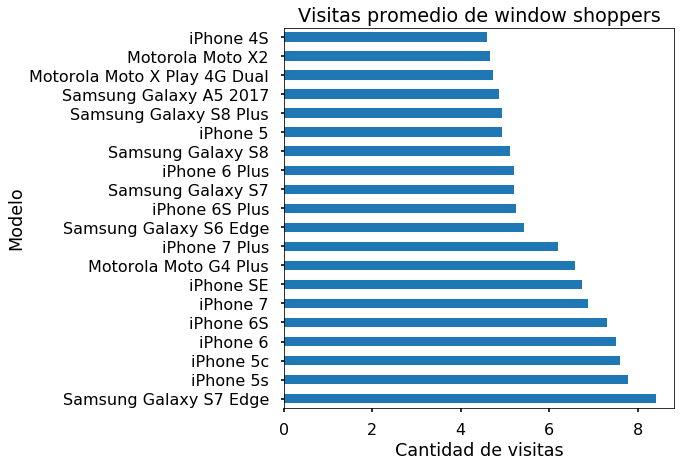

In [56]:
views_sin_compras.head(20).plot(kind="barh", figsize=(7,7), legend=False, x="model")

plt.title("Visitas promedio de window shoppers")
plt.xlabel("Cantidad de visitas")
plt.ylabel("Modelo")

# 5. Análisis de ventas

## 5.1 Calidad de productos vendidos

In [57]:
ventas = df_eventos.loc[df_eventos["event"] == "conversion",["condition","total"]]

In [58]:
ventas.groupby("condition", as_index=False).sum()

,condition,total
0,Bom,538
1,Bom - Sem Touch ID,22
2,Excelente,258
3,Muito Bom,352
4,Novo,2


Para confirmar los puntos 1 y 2 necesitariamos datos que no tenemos por lo tanto vamos a tomar la opción 3 como valida y descartar los casos con estas dos condiciones.

In [59]:
ventas = ventas.loc[ventas["condition"].isin(["Bom", "Muito Bom", "Excelente"]), :]

In [60]:
ventas_totales = ventas.groupby("condition",as_index=False).sum()

In [61]:
ventas_totales

,condition,total
0,Bom,538
1,Excelente,258
2,Muito Bom,352


(-1.25, 1.25, -1.25, 1.25)

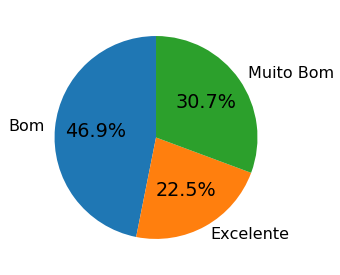

In [62]:
ventas_totales.plot(kind="pie",y="total",autopct='%1.1f%%', ax=plt.subplot(121, aspect='equal'),
 startangle=90, shadow=False, labels=ventas_totales["condition"], legend = False, figsize=(10,10))

plt.axis("off")

Como podemos observar, a menor "calidad" del producto mayores son las ventas. Los motivos pueden ser varios, por ejemplo pueden llegar a preferir comprar el producto completamente nuevo a comprar uno en estado "excelente". También hay que tener en cuenta que se trata de un sitio que vende celulares usuarios por lo que la gente que ingresa al sitio esta previamente dispuesta a sacrificar un poco de calidad por un mejor precio.

## 5.2 Arrepentidos

Los arrepentidos son las personas que llegaron a instancias de checkout pero nunca realizaron la compra.

In [63]:
checkouts = df_eventos.loc[df_eventos["event"] == "checkout",["timestamp","person","sku","model"]]
ventas = df_eventos.loc[df_eventos["event"] == "conversion",["timestamp","person", "sku", "model"]]

In [64]:
checkouts = checkouts.rename(index=str, columns={"timestamp" : "fecha_checkout"})
ventas = ventas.rename(index=str, columns={"timestamp" : "fecha_venta"})

In [65]:
# Me quedo con un unico checkout por combinacion de persona y producto
checkouts = checkouts.groupby(["person", "sku"], as_index=False).head(1)

In [66]:
merged = checkouts.merge(ventas, how="left", left_on=["person", "sku", "model"], right_on=["person", "sku", "model"])

In [67]:
# Obtengo los checkouts sin ventas
checkouts_sin_ventas = merged.loc[merged["fecha_venta"].isnull(),["sku", "model"]]
checkouts_sin_ventas["cantidad"] = 1

Ahora puedo rankear los productos que más checkouts tuvieron sin haber sido vendidos

In [68]:
checkouts_sin_ventas = checkouts_sin_ventas.groupby(["sku", "model"], as_index=False).sum()

In [69]:
checkouts_sin_ventas.nlargest(10, "cantidad")

,sku,model,cantidad
508,6357.0,Samsung Galaxy J5,431
511,6371.0,Samsung Galaxy J5,429
255,2831.0,iPhone 6,331
520,6413.0,Samsung Galaxy J7,287
254,2830.0,iPhone 6,260
488,6023.0,iPhone 5s,242
793,8443.0,Samsung Galaxy S7,241
1268,12758.0,Samsung Galaxy S8,235
253,2829.0,iPhone 6,231
367,3371.0,Samsung Galaxy S6 Flat,216


Esta tabla me muestra los productos que más arrepentidos tienen, pero también se puede agrupar por modelo.

In [70]:
checkouts_sin_ventas = checkouts_sin_ventas.drop(columns="sku")
checkouts_sin_ventas = checkouts_sin_ventas.groupby("model", as_index=False).sum()

In [71]:
checkouts_sin_ventas.nlargest(20, "cantidad")

,model,cantidad
171,iPhone 6,2979
170,iPhone 5s,2367
173,iPhone 6S,2129
85,Samsung Galaxy J5,1768
120,Samsung Galaxy S7,1180
175,iPhone 7,1143
122,Samsung Galaxy S8,1042
176,iPhone 7 Plus,869
121,Samsung Galaxy S7 Edge,785
119,Samsung Galaxy S6 Flat,781


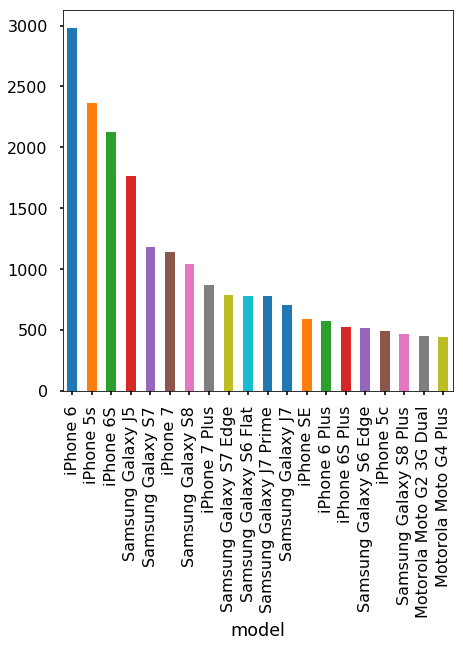

In [72]:
checkouts_sin_ventas.nlargest(20,"cantidad").plot(kind="bar", x="model", y="cantidad", figsize=(7,7), legend=False)

A partir de esta tabla se puede tomar medidas para motivar al usuario al terminar esa compra, las estrategias van desde las económicas como ofrecer descuentos o garantías extendidas hasta algo más técnico como un cambio en la UI.

## 5.3 Análisis de ventas y checkouts

### 5.3.1 Checkouts por usuario

In [73]:
df_eventos_checkout = df_eventos[df_eventos['event']=='checkout']
df_eventos_checkout.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,browser_version,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,timestamp_mes,timestamp_mes_desc,model_marca,model_tipo,model_subtipo,total
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,151,3,Thursday,5,May,iPhone,5s,None,1
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,149,1,Tuesday,5,May,Samsung,Galaxy,S8,1
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,12660.0,Motorola Moto Z Play,Bom,32GB,Preto,NaN,...,NaN,144,3,Thursday,5,May,Motorola,Moto,Z,1
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,6355.0,Samsung Galaxy J5,Excelente,16GB,Preto,NaN,...,NaN,96,4,Friday,4,Apr,Samsung,Galaxy,J5,1
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,6355.0,Samsung Galaxy J5,Excelente,16GB,Preto,NaN,...,NaN,96,4,Friday,4,Apr,Samsung,Galaxy,J5,1


In [74]:
df_eventos_groupby_event_checkout = df_eventos_checkout.groupby(['model']).sum()
df_eventos_groupby_event_checkout = df_eventos_groupby_event_checkout[['total']].reset_index()
df_eventos_groupby_event_checkout.set_index('model', inplace=True)

In [75]:
df_eventos_groupby_checkout_top10 = df_eventos_groupby_event_checkout.sort_values('total', ascending=False).head(10)
df_eventos_groupby_checkout_top10

,total
model,
iPhone 6,3295
iPhone 5s,2744
iPhone 6S,2308
Samsung Galaxy J5,1918
Samsung Galaxy S7,1234
iPhone 7,1205
Samsung Galaxy S8,1074
iPhone 7 Plus,924
Samsung Galaxy J7 Prime,866


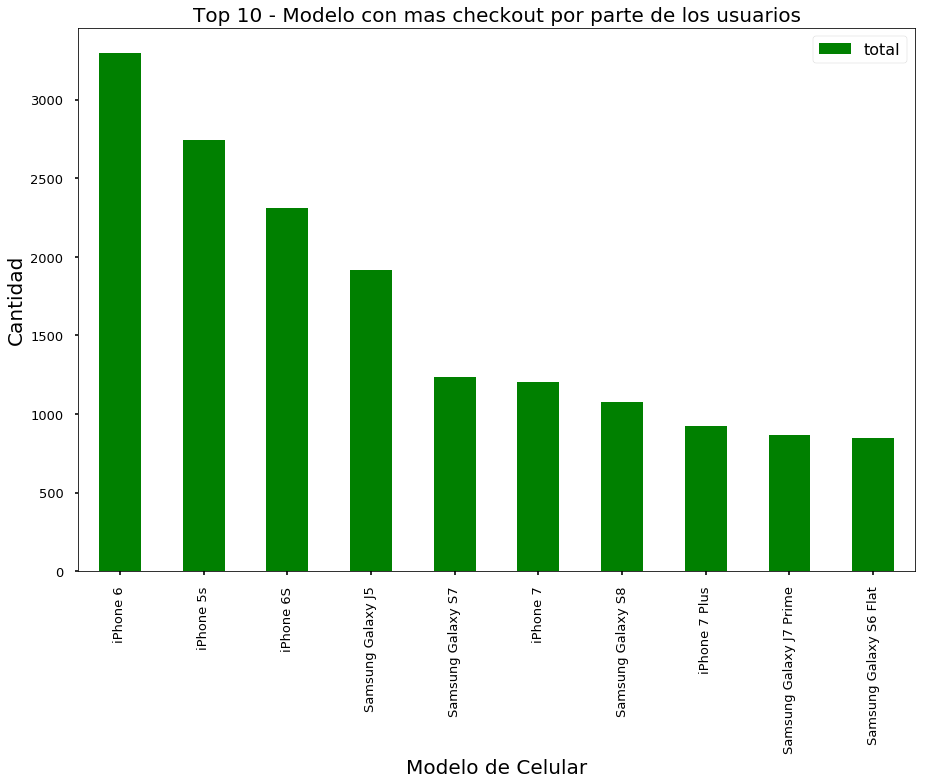

In [76]:
df_eventos_groupby_checkout_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Modelo con mas checkout por parte de los usuarios', fontsize=20);
plt.ylabel('Cantidad', fontsize=20);
plt.xlabel('Modelo de Celular', fontsize=20);

Vemos que predomina en los primeros 10 tanto Apple como Samsung como marcas favoritas al momento de elegir un producto.

### 5.3.2 Marcas con más checkouts 

In [77]:
df_eventos_groupby_event_checkout_marca = df_eventos_checkout.groupby(['model_marca']).sum()
df_eventos_groupby_event_checkout_marca = df_eventos_groupby_event_checkout_marca[['total']].reset_index()
df_eventos_groupby_event_checkout_marca.set_index('model_marca', inplace=True)

In [78]:
df_eventos_groupby_checkout_marca_top5 = df_eventos_groupby_event_checkout_marca.sort_values('total', ascending=False).head(5)
df_eventos_groupby_checkout_marca_top5

,total
model_marca,
Samsung,14707
iPhone,14082
Motorola,3738
LG,562
Lenovo,272


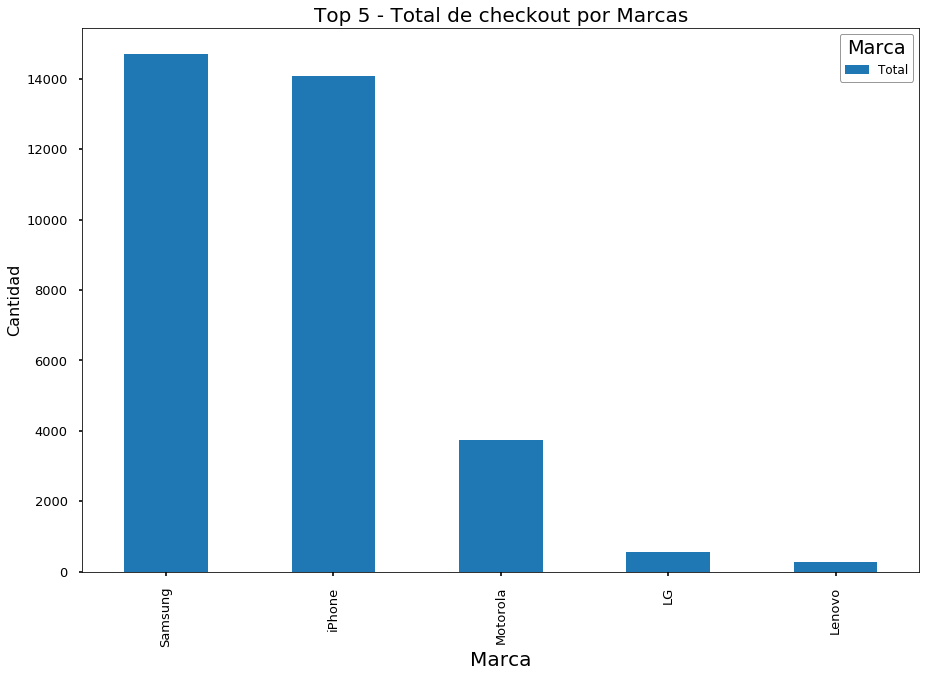

In [79]:
df_eventos_groupby_checkout_marca_top5.plot(kind='bar',stacked=True, rot=90, figsize=(15,10), fontsize=13)
plt.title('Top 5 - Total de checkout por Marcas', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Marca', fontsize=20);
leyenda=plt.legend(['Total'],fontsize=12,title='Marca',frameon=True,facecolor='white',edgecolor='gray')
leyenda.get_frame().set_linewidth(1.0)

Aca encontramos como primer insigth que si bien los primeros 3 modelos con más checkout son de Apple, Samsung supera a su rival directo Apple. Uno de los opciones sea la variedad de modelos de Samsung vs los ofrecidos por Apple

### 5.3.3 Capacidades (storage) más vendidas 

In [80]:
compras = df_eventos.loc[df_eventos["event"] == "conversion", ["storage", "total"]]
compras = compras.groupby(['storage']).sum()
compras

,total
storage,
128GB,27
16GB,552
256GB,1
32GB,265
4GB,17
512MB,3
64GB,102
8GB,205


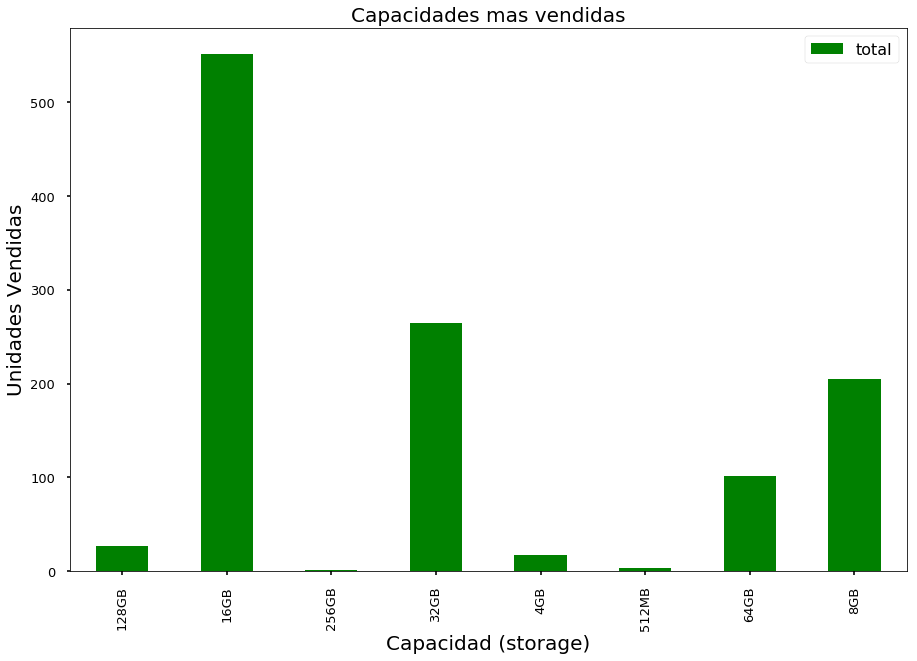

In [81]:
compras.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Capacidades mas vendidas', fontsize=20);
plt.ylabel('Unidades Vendidas', fontsize=20);
plt.xlabel('Capacidad (storage)', fontsize=20);

Vemos que la mayoría de los compradores buscan un almacenamiento promedio en sus dispositivos (posiblemente tienen en cuenta una relación de costo/beneficio a la hora de realizar la elección)

### 5.3.3 Checkouts por día por marca

In [82]:
df_eventos_groupby_event_checkout_dia = df_eventos_checkout.groupby(['model_marca','timestamp_diaDeLaSemana_desc','timestamp_diaDeLaSemana']).sum()
df_eventos_groupby_event_checkout_dia = df_eventos_groupby_event_checkout_dia[['total']].reset_index()
df_eventos_groupby_event_checkout_dia.set_index('timestamp_diaDeLaSemana_desc','timestamp_diaDeLaSemana', inplace=True)

In [83]:
df_eventos_groupby_event_checkout_dia.sort_values(['timestamp_diaDeLaSemana','total'], ascending=False).head(20)

,model_marca,timestamp_diaDeLaSemana,total
timestamp_diaDeLaSemana_desc,,,
Sunday,Samsung,6,1432
Sunday,iPhone,6,1337
Sunday,Motorola,6,265
Sunday,LG,6,48
Sunday,Lenovo,6,26
Sunday,Sony,6,20
Sunday,Quantum,6,4
Sunday,iPad,6,3
Sunday,Asus,6,2


In [84]:
df_eventos_groupby_event_checkout_dia[df_eventos_groupby_event_checkout_dia['model_marca']=='Samsung'].sort_values('timestamp_diaDeLaSemana', ascending=True).head(100)

,model_marca,timestamp_diaDeLaSemana,total
timestamp_diaDeLaSemana_desc,,,
Monday,Samsung,0,2074
Tuesday,Samsung,1,2502
Wednesday,Samsung,2,2517
Thursday,Samsung,3,2391
Friday,Samsung,4,2287
Saturday,Samsung,5,1504
Sunday,Samsung,6,1432


In [85]:
df_eventos_groupby_event_checkout_dia2 = df_eventos_groupby_event_checkout_dia.reset_index()
df_eventos_groupby_event_checkout_dia2

,timestamp_diaDeLaSemana_desc,model_marca,timestamp_diaDeLaSemana,total
0,Friday,Asus,4,13
1,Monday,Asus,0,9
2,Saturday,Asus,5,8
3,Sunday,Asus,6,2
4,Thursday,Asus,3,14
5,Tuesday,Asus,1,6
6,Wednesday,Asus,2,11
7,Friday,LG,4,85
8,Monday,LG,0,98
9,Saturday,LG,5,55


In [86]:
top_df_eventos_groupby_event_checkout_dia2_2 = pd.pivot_table(df_eventos_groupby_event_checkout_dia2,values=['total'],
               columns='timestamp_diaDeLaSemana_desc',aggfunc=np.sum,fill_value=0)
top_df_eventos_groupby_event_checkout_dia2_2

timestamp_diaDeLaSemana_desc,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
total,5244,4621,3474,3137,5559,5926,5772


In [87]:
df_eventos_groupby_event_checkout_dia2

,timestamp_diaDeLaSemana_desc,model_marca,timestamp_diaDeLaSemana,total
0,Friday,Asus,4,13
1,Monday,Asus,0,9
2,Saturday,Asus,5,8
3,Sunday,Asus,6,2
4,Thursday,Asus,3,14
5,Tuesday,Asus,1,6
6,Wednesday,Asus,2,11
7,Friday,LG,4,85
8,Monday,LG,0,98
9,Saturday,LG,5,55


In [88]:
df_eventos_groupby_event_checkout_dia3 = df_eventos_groupby_event_checkout_dia.reset_index()
df_eventos_groupby_event_checkout_dia3

,timestamp_diaDeLaSemana_desc,model_marca,timestamp_diaDeLaSemana,total
0,Friday,Asus,4,13
1,Monday,Asus,0,9
2,Saturday,Asus,5,8
3,Sunday,Asus,6,2
4,Thursday,Asus,3,14
5,Tuesday,Asus,1,6
6,Wednesday,Asus,2,11
7,Friday,LG,4,85
8,Monday,LG,0,98
9,Saturday,LG,5,55


In [89]:
top_df_eventos_groupby_event_checkout_dia3_2 = pd.pivot_table(df_eventos_groupby_event_checkout_dia3,values=['total'],
               index=['timestamp_diaDeLaSemana','timestamp_diaDeLaSemana_desc'],columns='model_marca',aggfunc=np.sum,fill_value=0)
top_df_eventos_groupby_event_checkout_dia3_2

total              \
model_marca                                           Asus   LG Lenovo   
timestamp_diaDeLaSemana timestamp_diaDeLaSemana_desc                     
0                       Monday                           9   98     41   
1                       Tuesday                          6   93     51   
2                       Wednesday                       11  103     38   
3                       Thursday                        14   80     44   
4                       Friday                          13   85     52   
5                       Saturday                         8   55     20   
6                       Sunday                           2   48     26   

                                                                               \
model_marca                                          Motorola Quantum Samsung   
timestamp_diaDeLaSemana timestamp_diaDeLaSemana_desc                            
0                       Monday                            502       2    2074   
1                       Tuesday                           648       3    2502   
2                       Wednesday                         622       3    2517   
3                       Thursday                          681       2    2391   
4                       Friday                            646       5    2287   
5                       Saturday                          374       0    1504   
6                       Sunday                            265       4    1432   

                                                                       
model_marca                                          Sony iPad iPhone  
timestamp_diaDeLaSemana timestamp_diaDeLaSemana_desc                   
0                       Monday                         38   18   1839  
1                       Tuesday                        36   13   2574  
2                       Wednesday                      35   11   2432  
3                       Thursday                       28    9   2310  
4                       Friday                         37    9   2110  
5                       Saturday                       24    9   1480  
6                       Sunday                         20    3   1337

[Text(0,0.5,u'0-Monday'),
 Text(0,1.5,u'1-Tuesday'),
 Text(0,2.5,u'2-Wednesday'),
 Text(0,3.5,u'3-Thursday'),
 Text(0,4.5,u'4-Friday'),
 Text(0,5.5,u'5-Saturday'),
 Text(0,6.5,u'6-Sunday')]

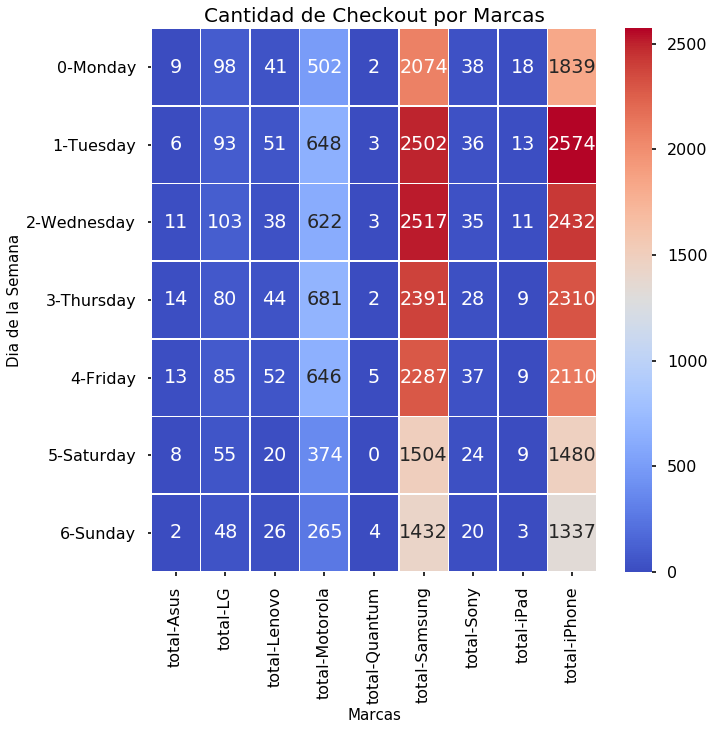

In [90]:
plt.subplots(figsize=(10,10))
grafico_event_checkout_dia2_3=sns.heatmap(top_df_eventos_groupby_event_checkout_dia3_2,linewidths=.5,fmt="d",annot=True,cmap="coolwarm")

grafico_event_checkout_dia2_3.set_title("Cantidad de Checkout por Marcas",fontsize=20)
grafico_event_checkout_dia2_3.set_xlabel("Marcas",fontsize=15)
grafico_event_checkout_dia2_3.set_ylabel("Dia de la Semana",fontsize=15)
grafico_event_checkout_dia2_3.set_xticklabels(grafico_event_checkout_dia2_3.get_xticklabels(),rotation=90)
grafico_event_checkout_dia2_3.set_yticklabels(grafico_event_checkout_dia2_3.get_yticklabels(),rotation=0)

### 5.3.4 Ventas por Marca por día

Vamos a ver cómo se afectan las ventas para cada marca en función de los días de la semana.

[Text(0.5,0,'Lunes'),
 Text(1.5,0,'Martes'),
 Text(2.5,0,'Miercoles'),
 Text(3.5,0,'Jueves'),
 Text(4.5,0,'Viernes'),
 Text(5.5,0,'Sabado'),
 Text(6.5,0,'Domingo')]

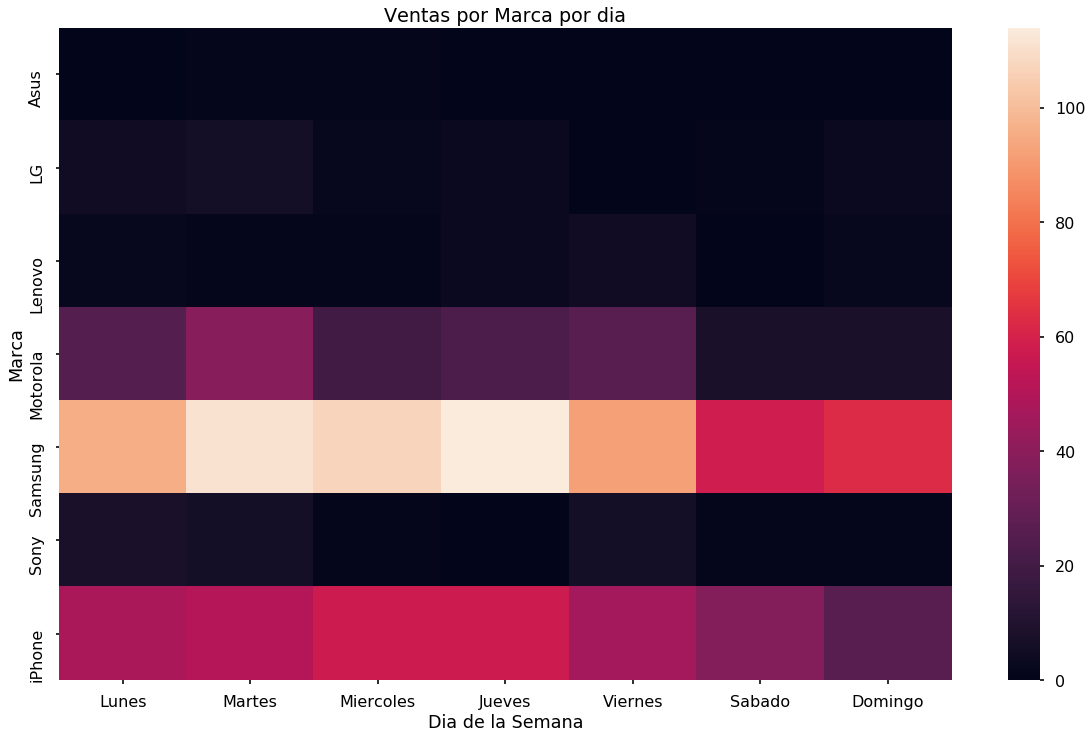

In [91]:
ventas = df_eventos.loc[df_eventos["event"] == "conversion",["timestamp_diaDeLaSemana", "timestamp_diaDeLaSemana_desc", "model_marca", "total"]]
ventas = ventas.groupby(["timestamp_diaDeLaSemana", "timestamp_diaDeLaSemana_desc", "model_marca"],as_index=False).sum()
ventas = ventas.pivot("model_marca", "timestamp_diaDeLaSemana", "total").fillna(0)
plt.figure(figsize=(20,12))
ax = sns.heatmap(ventas)
ax.set_title("Ventas por Marca por dia")
ax.set_ylabel('Marca')
ax.set_xlabel('Dia de la Semana')
ax.set_xticklabels(['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])

### 5.3.5 Ventas por marca y modelo

In [92]:
df_eventos_conversion = df_eventos[df_eventos['event']=='conversion']
df_eventos_conversion.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,browser_version,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,timestamp_mes,timestamp_mes_desc,model_marca,model_tipo,model_subtipo,total
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,79,1,Tuesday,3,Mar,Motorola,Moto,X2,1
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,116,3,Thursday,4,Apr,Samsung,Galaxy,Core,1
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,161,6,Sunday,6,Jun,Samsung,Galaxy,S6,1
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,75,4,Friday,3,Mar,iPhone,5s,None,1
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,40,4,Friday,2,Feb,Samsung,Galaxy,J5,1


In [93]:
df_eventos_groupby_event_conversion = df_eventos_conversion.groupby(['model']).sum()
df_eventos_groupby_event_conversion = df_eventos_groupby_event_conversion[['total']].reset_index()
df_eventos_groupby_event_conversion.set_index('model', inplace=True)

In [94]:
df_eventos_groupby_conversion_top10 = df_eventos_groupby_event_conversion.sort_values('total', ascending=False).head(10)
df_eventos_groupby_conversion_top10

,total
model,
Samsung Galaxy J5,88
iPhone 5s,84
iPhone 6,71
Samsung Galaxy S6 Flat,39
iPhone 6S,37
iPhone 5c,33
Motorola Moto G4 Plus,30
Motorola Moto G3 4G,30
Samsung Galaxy J7,28


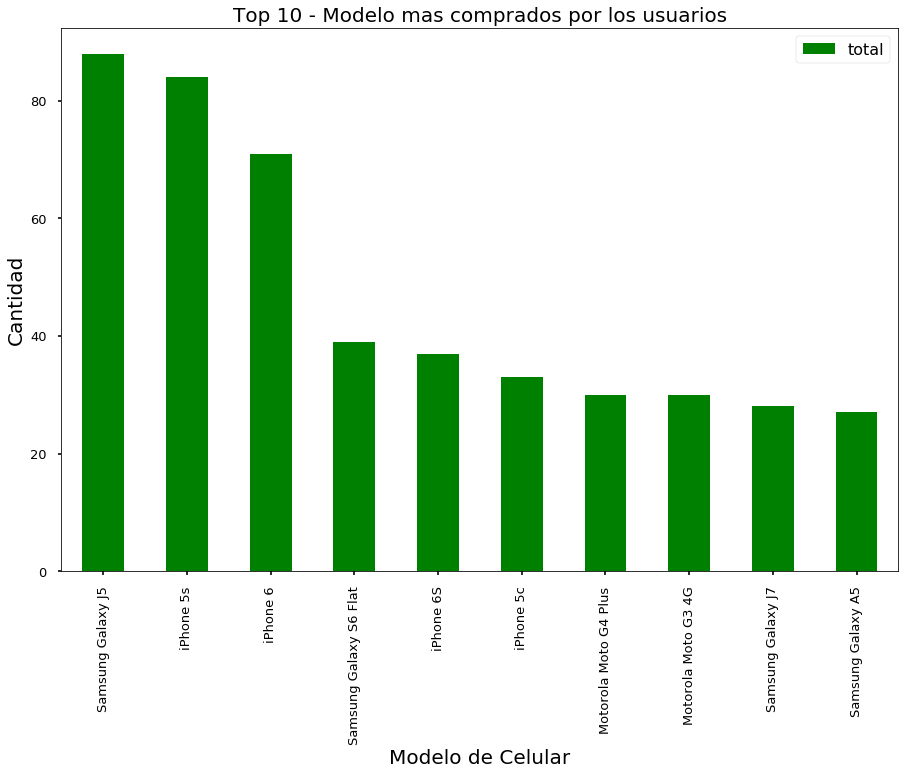

In [95]:
df_eventos_groupby_conversion_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Modelo mas comprados por los usuarios', fontsize=20);
plt.ylabel('Cantidad', fontsize=20);
plt.xlabel('Modelo de Celular', fontsize=20);

### 5.3.6 Ventas vs Checkouts

In [96]:
pd_combinado = pd.merge(df_eventos_groupby_event_checkout.reset_index(), df_eventos_groupby_event_conversion.reset_index(), on='model')
pd_combinado.rename(columns={'total_x': 'total_checkout'}, inplace=True)
pd_combinado.rename(columns={'total_y': 'total_conversion'}, inplace=True)

pd_combinado.set_index('model', inplace=True)
pd_combinado.sort_values('total_conversion', ascending=False)
#pd_combinado

,total_checkout,total_conversion
model,,
Samsung Galaxy J5,1918,88
iPhone 5s,2744,84
iPhone 6,3295,71
Samsung Galaxy S6 Flat,844,39
iPhone 6S,2308,37
iPhone 5c,603,33
Motorola Moto G4 Plus,508,30
Motorola Moto G3 4G,340,30
Samsung Galaxy J7,789,28


In [97]:
pd_combinado_top10 = pd_combinado.sort_values('total_checkout', ascending=False).head(20)
pd_combinado_top10 

,total_checkout,total_conversion
model,,
iPhone 6,3295,71
iPhone 5s,2744,84
iPhone 6S,2308,37
Samsung Galaxy J5,1918,88
Samsung Galaxy S7,1234,18
iPhone 7,1205,16
Samsung Galaxy S8,1074,15
iPhone 7 Plus,924,6
Samsung Galaxy J7 Prime,866,20


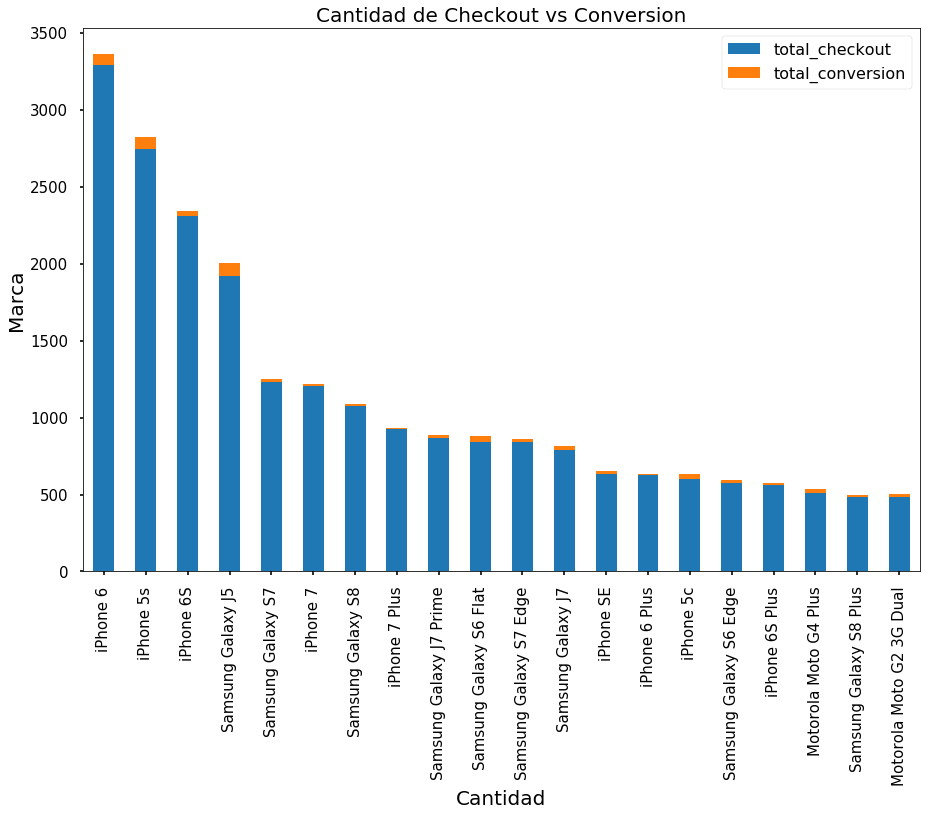

In [98]:
pd_combinado_top10.plot(kind= 'bar', stacked=True , rot=90, figsize=(15,10), fontsize=15)
plt.title('Cantidad de Checkout vs Conversion', fontsize=20);
plt.xlabel('Cantidad', fontsize=20);
plt.ylabel('Marca', fontsize=20);

Como conclusion de este grafico vemos que los usuarios han accedido varias veces al checkout antes de realizar la compra efectiva del producto, lo que tal vez demuestre que el usuario analiza varias veces antes de efectuar la compra

# 6. Análisis de campañas

## 6.1 Nuevos usuarios por campañas

In [99]:
# Filtro los eventos que me interesan
visitas = df_eventos.loc[df_eventos["event"] == "visited site",["timestamp", "new_vs_returning", "person"]]
campania = df_eventos.loc[df_eventos["event"] == "ad campaign hit",["timestamp", "campaign_source", "person"]]

In [100]:
visitas = visitas.rename(index=str, columns = {"timestamp" : "fecha visita"})
campania = campania.rename(index=str, columns = {"timestamp" : "fecha campania"})

In [101]:
# Obtengo las visitas de usuarios nuevos
visitas = visitas.loc[visitas["new_vs_returning"] == "New",["fecha visita", "person"]]

In [102]:
# Me quedo con la primer fecha de acceso a la pagina de cada usuario ya que el resto de las veces seria un "Returning"
campania = campania.groupby("person", as_index=False).min()

In [103]:
# Matcheamos la hora de la primer visita del usuario al sitio con la hora de su primer click en campaña
visitas_por_campania = visitas.merge(campania, how="inner", left_on="person", right_on="person")
visitas_por_campania = visitas_por_campania.drop(columns="person")

In [104]:
# Convierto las columnas de fechas a datetime para poder operar
visitas_por_campania["fecha visita"] = pd.to_datetime(visitas_por_campania["fecha visita"])
visitas_por_campania["fecha campania"] = pd.to_datetime(visitas_por_campania["fecha campania"])

In [105]:
# Para contabilizarlo como nuevo debido a la campaña la diferencia de tiempo entre los eventos debe ser poca
# Establezco un límite de 5 segundos de diferencia máxima
visitas_por_campania = visitas_por_campania.loc[((visitas_por_campania["fecha visita"] - visitas_por_campania["fecha campania"]) < pd.Timedelta("0 days 00:00:05")) & 
                                               ((visitas_por_campania["fecha visita"] - visitas_por_campania["fecha campania"]) > pd.Timedelta("-1 days +23:59:55")), :]

Ahora que ya estableci que todos los eventos que tengo son de campañas que resultaron en nuevos clientes puedo quedarme unicamente con el nombre de la campaña y una de las columas que marcan la fecha ya que las dos son equivalentes.

In [106]:
visitas_por_campania = visitas_por_campania.drop(columns="fecha visita")
visitas_por_campania["cantidad"] = 1

In [107]:
# Puedo analizar como aportan las campañas mes a mes
campania_por_mes = visitas_por_campania
campania_por_mes["mes"] = campania_por_mes["fecha campania"].dt.month
campania_por_mes = campania_por_mes.drop(columns="fecha campania")

In [108]:
campania_por_mes = campania_por_mes.groupby(["campaign_source", "mes"], as_index=False).sum()
campania_por_mes = campania_por_mes.sort_values(by="cantidad", ascending=False)

In [109]:
campania_por_mes.head(20)

,campaign_source,mes,cantidad
64,google,5,6400
65,google,6,5613
49,criteo,5,1787
50,criteo,6,1312
63,google,4,594
62,google,3,360
48,criteo,4,307
47,criteo,3,215
16,FacebookAds,6,169
61,google,2,162


Podemos observar que Google en el mes de mayo es el que más nuevos usuarios nos trajo, también vemos que en otros meses los valores no son tan altos por lo que sería interesante verlo en un gráfico.

In [110]:
google_por_mes = campania_por_mes.loc[campania_por_mes["campaign_source"] == "google",:]

Text(0,0.5,'Cantidad de usuarios')

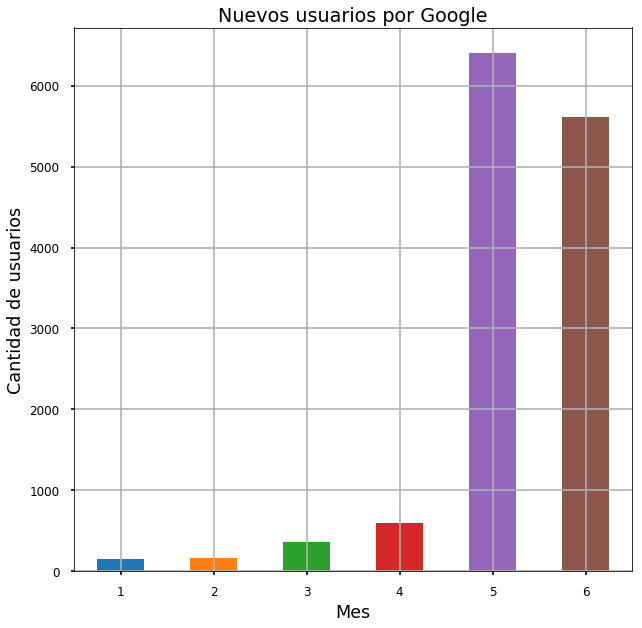

In [111]:
google_por_mes.sort_values(by="mes").plot(rot=0, kind="bar", x="mes", y="cantidad", figsize=(10,10), legend=False, fontsize=12, grid=True)

plt.title("Nuevos usuarios por Google")
plt.xlabel("Mes")
plt.ylabel("Cantidad de usuarios")

Podemos observar que en mayo la cantidad de nuevos usuarios que trajo Google aumentó muchísimo, para este gráfico también hay que tener en cuenta que los datos de junio son parciales (solo tenemos la mitad de junio cargada)

Otro gráfico que nos resulta interesante es ver el aporte de cada campaña en el mes de mayo. Elegimos el mes de mayo ya que es el último mes que fue cargado completamente.

In [112]:
mayo = campania_por_mes.loc[campania_por_mes["mes"] == 5,:]

In [113]:
mayo

,campaign_source,mes,cantidad
64,google,5,6400
49,criteo,5,1787
36,bing,5,86
58,emblue,5,84
30,afilio,5,79
15,FacebookAds,5,78
76,rtbhouse,5,53
83,zanox,5,51
9,Facebook,5,18
24,afiliado,5,9


Podemos observar a simple vista que la diferencia de usuarios nuevos que obtenemos por Google y Criteo es gigantesca.

Text(0,0.5,'Campania')

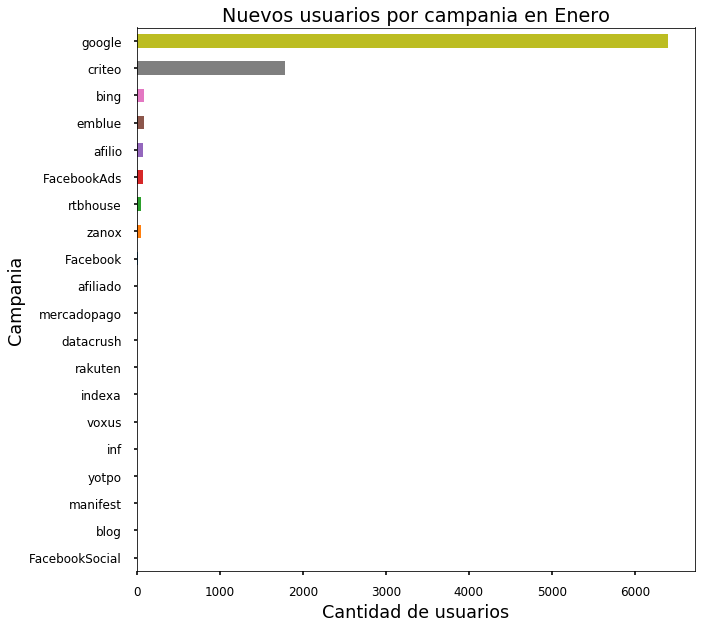

In [114]:
mayo.sort_values(by="cantidad").plot(rot=0, kind="barh", x="campaign_source", y="cantidad", figsize=(10,10), legend=False, fontsize=12)

plt.title("Nuevos usuarios por campania en Enero")
plt.xlabel("Cantidad de usuarios")
plt.ylabel("Campania")

Basados en estos resultados Trocafone podría, por ejemplo, dejar de abonar por publicidad en las peores campañas.

Por último podriamos observar cómo es el histórico de usuarios nuevos por campaña.

In [115]:
campanias_historico = campania_por_mes.drop(columns={"mes"})
campanias_historico = campanias_historico.groupby("campaign_source", as_index=False).sum().sort_values(by="cantidad", ascending=False)

In [116]:
campanias_historico.head(20)

,campaign_source,cantidad
14,google,13276
11,criteo,3805
2,FacebookAds,355
7,afilio,196
13,emblue,178
8,bing,169
19,rtbhouse,103
22,zanox,88
10,buscape,38
1,Facebook,36


Se mantiene la tendencia que observamos en el mes de mayo, las campañas más provechosas en usuarios son las de Google y Criteo

## 6.2 Ventas por campañas

Previamente hemos analizado el éxito de una campaña en base a la generación de nuevos usuarios del sitio. Ahora vamos a observar a esas personas y analizaremos si las mismas han realizado alguna compra en el sitio. Es decir, que nos interesa ver que campañas se han traducido en ventas concretas.

In [117]:
campania = df_eventos.loc[df_eventos["event"] == "ad campaign hit",["campaign_source", "person"]]
campania = campania.groupby("person", as_index=False).min()

In [118]:
ventas = df_eventos.loc[df_eventos["event"] == "conversion",["person", "total"]]
ventas = ventas.groupby("person", as_index=False).sum()

In [119]:
ventas_por_campania = ventas.merge(campania, how="inner", left_on="person", right_on="person")
ventas_por_campania = ventas_por_campania.drop(columns="person")
ventas_por_campania = ventas_por_campania.groupby("campaign_source", as_index=False).sum().sort_values(by="total",ascending=False)
ventas_por_campania

,campaign_source,total
7,criteo,369
10,google,344
2,FacebookAds,55
9,emblue,51
4,bing,48
3,afilio,46
6,buscape,10
12,rtbhouse,10
1,Facebook,7
14,zanox,7


Text(0,0.5,'Campania')

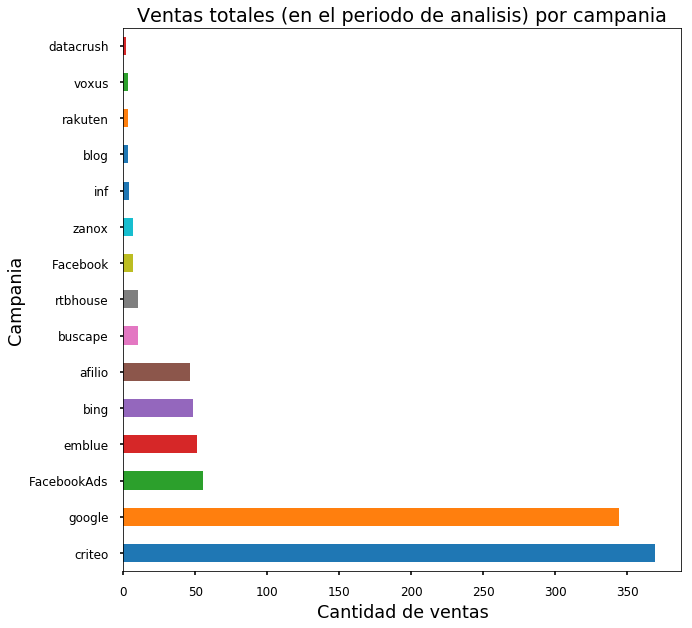

In [120]:
ventas_por_campania.plot(rot=0, kind="barh", x="campaign_source", y="total", figsize=(10,10), legend=False, fontsize=12)

plt.title("Ventas totales (en el periodo de analisis) por campania")
plt.xlabel("Cantidad de ventas")
plt.ylabel("Campania")

Si tomamos en cuenta nuevamente el gráfico de nuevos usuarios por campaña, podemos ver que, si bien Google ha atraído una gran cantidad de nuevos usuarios, la mayoría de éstos no compran en el sitio, mientras que en comparación los llegan a traves del servicio de publicidad de Amazon, "Criteo", lo hacen en un mayor porcentaje.

A partir de estos resultados puede definirse con más claridad a qué campañas destinar más recursos: ¿Queremos que nos visite más gente?, ¿queremos que la gente que nos visite compre?